<a href="https://colab.research.google.com/github/pejmanrasti/Formation_institut_optique/blob/main/1_Mnist_DL_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Make your fist experience with Tensorflow-Keras**
Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
! pip install livelossplot

# **Importing necessary Libraries**

In [2]:
from livelossplot import PlotLossesKeras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential # Model type to be used
from tensorflow.keras.layers import Dense, Activation, Dropout# Make Fully connected (FC) layers
from tensorflow.keras.utils import to_categorical # NumPy related tools
from tensorflow.keras.callbacks import TensorBoard  #Visulization of Accuracy and loss

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
from sklearn.model_selection import train_test_split


## Loading Training and Validation Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [3]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_val_test, y_val_test) = mnist.load_data()
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42) # 0.5 means half of the validation data will be used for testing. Adjust as needed

Visualization of some input images

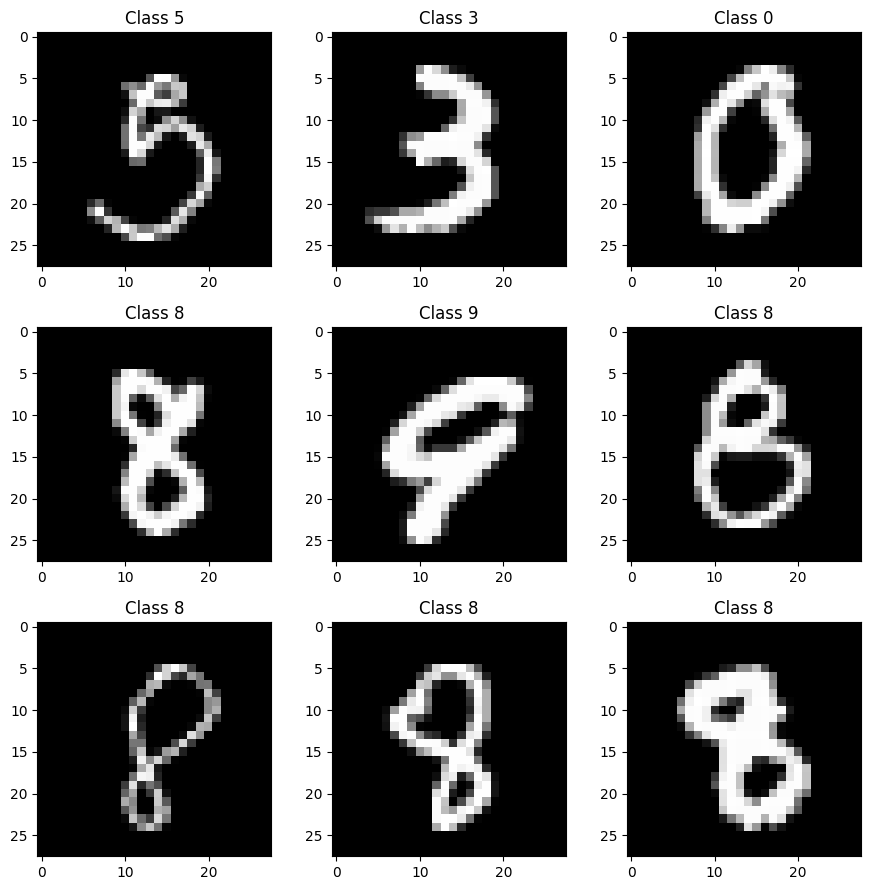

In [4]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_test))
    plt.imshow(X_test[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_test[num]))

plt.tight_layout()

## Formatting the input data layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector. Each image needs to be then reshaped (or flattened) into a vector.

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train /= 255.
X_val /= 255.
X_test /= 255.

We then modify our classes (unique digits) to be in the one-hot format, i.e.

In [6]:
# one hot encode outputs
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

# Building the simplest fully connected network (FCN) with just one layer

In [7]:
# The Sequential model is a linear stack of layers and is very common.
model = Sequential([
    Dense(10,input_shape=(784,)), # It is the output layer and should be equal to the number of desired classes (10 in this case).
    Activation('softmax'),
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the model

Keras is built on top of TensorFlow. It allows you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiling a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
plotlosses = PlotLossesKeras()

## Train the model!

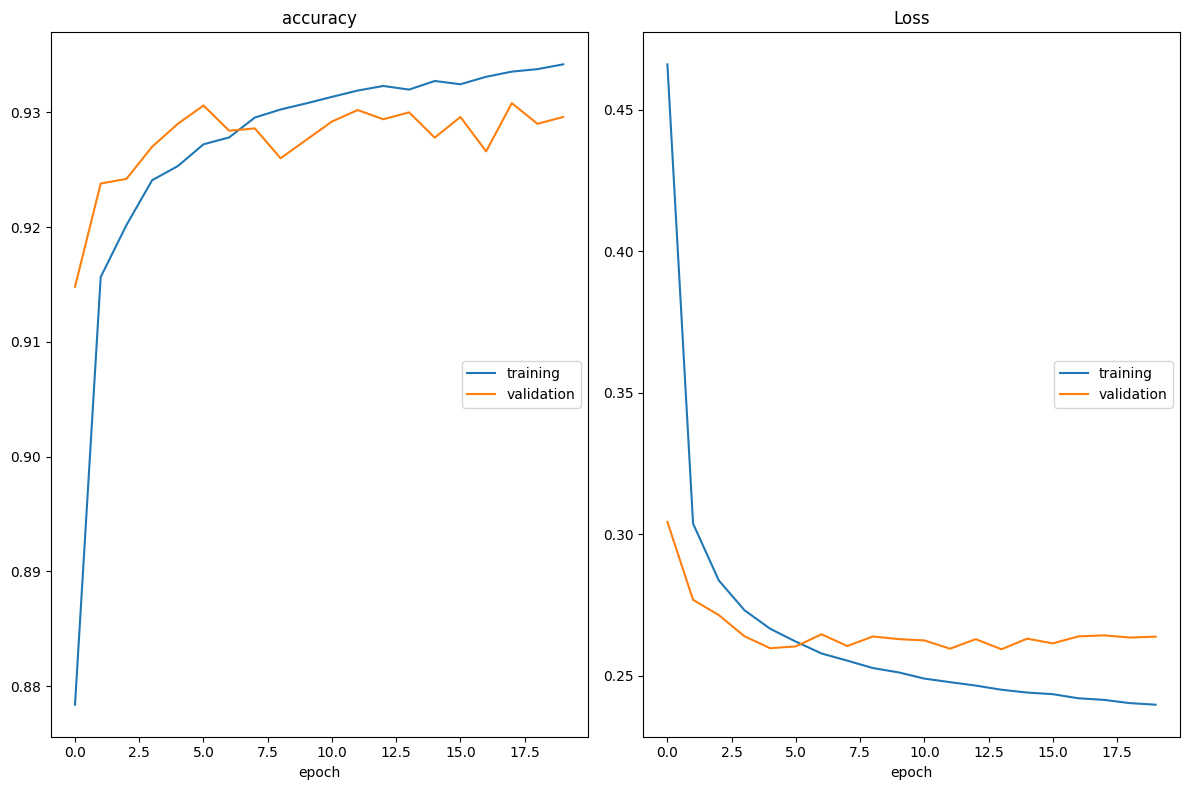

accuracy
	training         	 (min:    0.878, max:    0.934, cur:    0.934)
	validation       	 (min:    0.915, max:    0.931, cur:    0.930)
Loss
	training         	 (min:    0.240, max:    0.466, cur:    0.240)
	validation       	 (min:    0.259, max:    0.304, cur:    0.264)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9340 - loss: 0.2404 - val_accuracy: 0.9296 - val_loss: 0.2638


In [10]:
model.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=20, batch_size=32,
          verbose=1,
          callbacks=[plotlosses])

## Evaluate Model's Accuracy on Test Data
Your test data **Must** be different from the validation data, but in this example, we will use the validation data as the test data as well.

In [11]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9255 - loss: 0.2753
Test score: 0.27153319120407104
Test accuracy: 0.9251999855041504


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [12]:
print (model.predict(X_test))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.0937222e-07 9.2910923e-10 8.5773761e-04 ... 3.2055404e-08
  9.3624017e-08 2.9973503e-08]
 [2.2209356e-04 2.1212220e-07 9.9276018e-01 ... 3.3751955e-06
  5.2303011e-03 2.0262213e-04]
 [2.2760737e-07 1.4470420e-07 4.6048430e-05 ... 7.2979255e-11
  2.2358452e-03 2.9904743e-10]
 ...
 [1.0194931e-03 2.0195523e-06 1.2489120e-04 ... 5.0966725e-07
  1.9356975e-01 1.8333897e-03]
 [4.1863885e-08 4.8524737e-07 1.9371064e-04 ... 9.1353938e-04
  9.0327743e-04 8.7472928e-01]
 [9.7936648e-01 2.7788216e-13 1.7391798e-03 ... 6.5886272e-12
  2.3546412e-03 1.2558426e-06]]


In [13]:
# The predict function outputs the probability for each class
# according to the trained classifier for each input example.
# np.argmax is used to get the class with the highest probability.
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


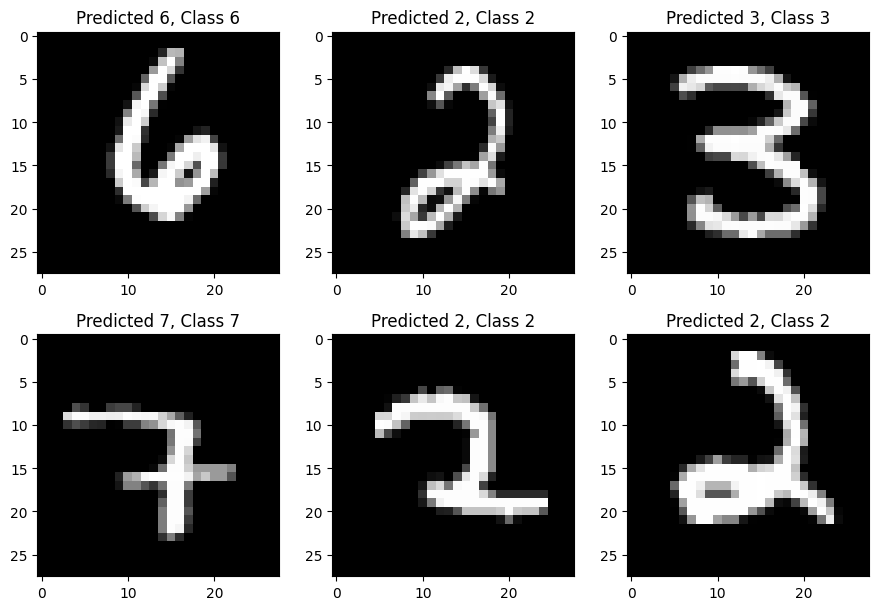

In [14]:
plt.figure()
for i, correct in enumerate(correct_indices[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()


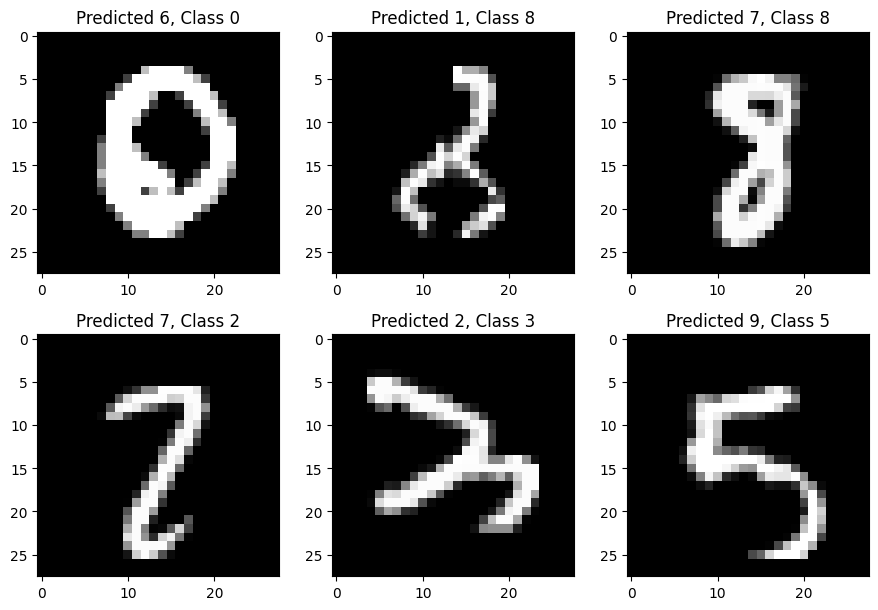

In [15]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

# **Let's go Deeper**
We will add four more layers to our model. We use Droupout in our model to reduce overfitting

In [16]:
# Dropout helps protect the model from memorizing or "overfitting" the training data.
Pkeep=0.25
modelDeepFC = Sequential([
    Dense(200, input_shape=(784,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(100, input_shape=(200,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(60, input_shape=(100,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(30, input_shape=(60,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(10),
    Activation('softmax'),
])

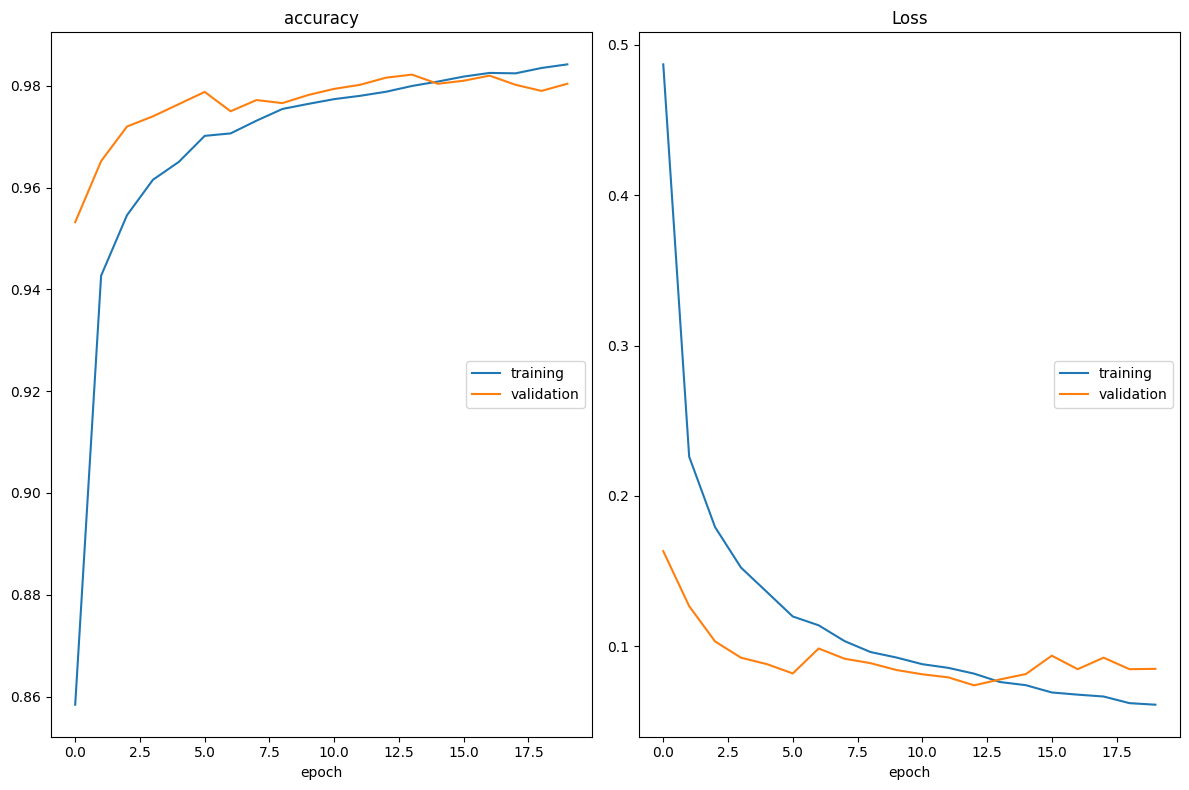

accuracy
	training         	 (min:    0.858, max:    0.984, cur:    0.984)
	validation       	 (min:    0.953, max:    0.982, cur:    0.980)
Loss
	training         	 (min:    0.061, max:    0.487, cur:    0.061)
	validation       	 (min:    0.074, max:    0.163, cur:    0.085)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9843 - loss: 0.0604 - val_accuracy: 0.9804 - val_loss: 0.0850


In [17]:
plotlossesdeeper = PlotLossesKeras()
modelDeepFC.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modelDeepFC.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=20, batch_size=32,
          verbose=1,
          callbacks=[plotlossesdeeper])

In [18]:
score_deep = modelDeepFC.evaluate(X_test, Y_test)
print('Test score:', score_deep[0])
print('Test accuracy:', score_deep[1])

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9797 - loss: 0.1128
Test score: 0.09548529982566833
Test accuracy: 0.9810000061988831


The performance of the last model with more layers showed a better performance compare with our first model.

# **Let's go furter with introducing CNN**
Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. curvature, edges) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies kernels (filters) that traverse through each image and generate feature maps.

In [19]:
# import some additional tools
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [20]:
# Reload the MNIST data
(X_train, y_train), (X_val_test, y_val_test) = mnist.load_data()
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42) # 0.5 means half of the validation data will be used for testing. Adjust as needed

In [21]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') #add an additional dimension to represent the single-channel
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_val /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_val.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Validation matrix shape (5000, 28, 28, 1)
Testing matrix shape (5000, 28, 28, 1)


In [22]:
# one hot encode outputs
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

In [23]:
modelCNN = Sequential([

    # Convolution Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 32 different 3x3 kernels -- so 32 feature maps
    MaxPooling2D(pool_size=(2, 2)), # Pool the max values over a 2x2 kernel

    # Convolution Layer 2
    Conv2D(64, (3, 3), activation='relu'), # 64 different 3x3 kernels
    MaxPooling2D(pool_size=(2, 2)),

    # Convolution Layer 3
    Conv2D(128, (3, 3), activation='relu'), # 128 different 3x3 kernels

    Flatten(), # Flatten final 7x7x128 output matrix into a 1024-length vector

    # Fully Connected Layer 4
    Dense(512), # 512 FCN nodes
    Activation('relu'),
    Dropout(0.2),
    Dense(10),
    Activation('softmax'),
])
modelCNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,138 (2.63 MB)

 Trainable params: 688,138 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

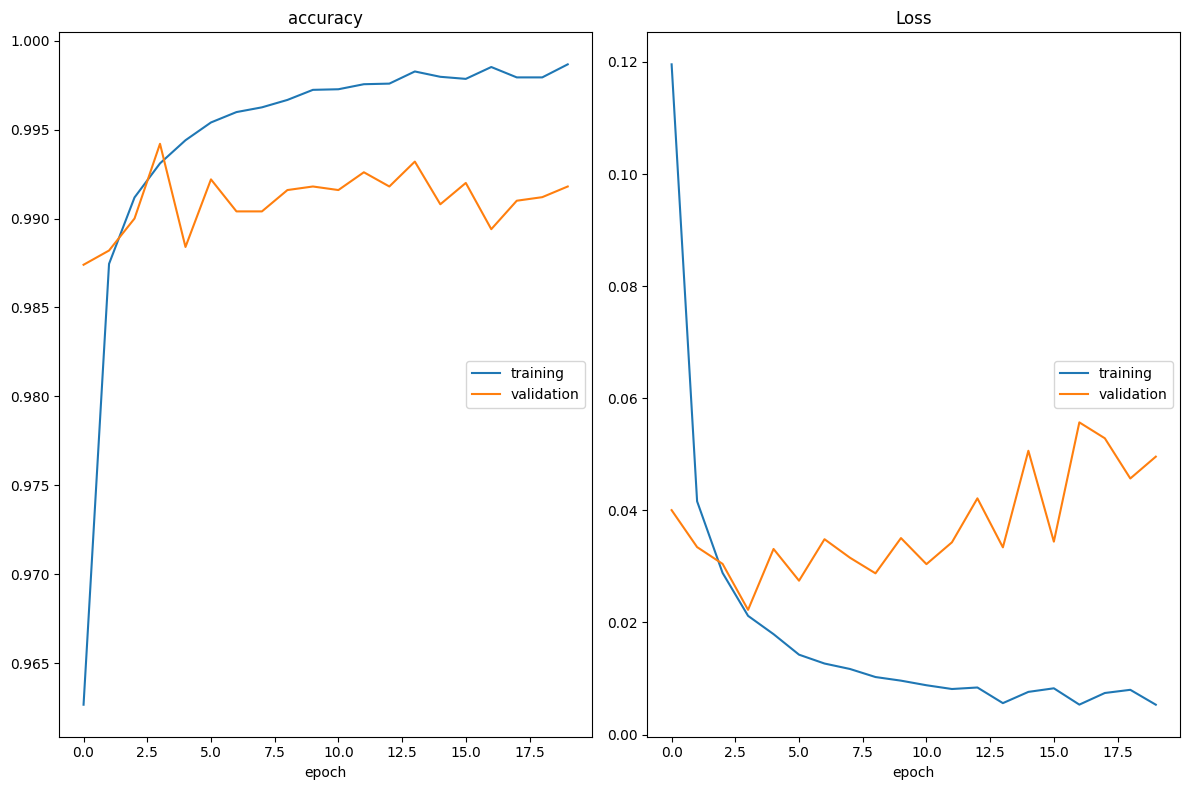

accuracy
	training         	 (min:    0.963, max:    0.999, cur:    0.999)
	validation       	 (min:    0.987, max:    0.994, cur:    0.992)
Loss
	training         	 (min:    0.005, max:    0.120, cur:    0.005)
	validation       	 (min:    0.022, max:    0.056, cur:    0.050)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 0.9918 - val_loss: 0.0496


In [24]:
plotlossesCNN = PlotLossesKeras()
modelCNN.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modelCNN.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=20, batch_size=32,
          verbose=1,
          callbacks=[plotlossesCNN])

**Evaluation and Prediction**

We can use our model to make a prediction on new images.

In [25]:
modelCNN.evaluate(X_test,Y_test) #Evaluation of the model on the test dataset

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9921 - loss: 0.0761


[0.05758436396718025, 0.993399977684021]

In [27]:
predicted_classes = np.argmax(modelCNN.predict(X_test), axis=-1)  # Get predicted classes using argmax
print(predicted_classes)  # Print the predicted classes

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[6 2 3 ... 8 9 0]


In [30]:
# Prediction of classes of a single image
img=X_test[1000,:,:,:]
img = np.array(img).reshape(-1, 28, 28, 1)
output = np.argmax(modelCNN.predict(img), axis=-1)
print('The predicted label is: ',output[0])
print('The real label is: ',y_test[1000])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
The predicted label is:  4
The real label is:  4


In [31]:
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

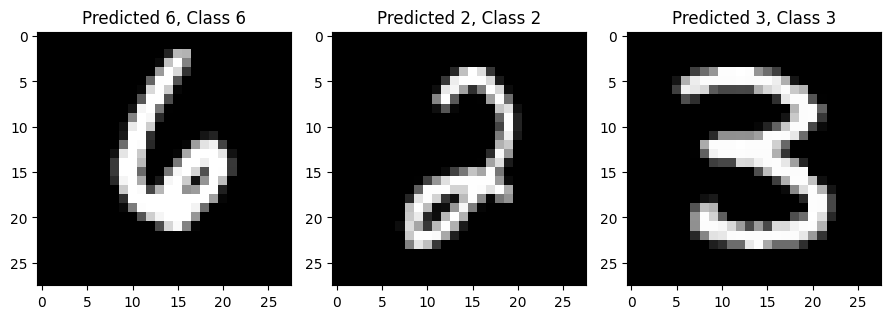

In [36]:
plt.figure()
for i, correct in enumerate(correct_indices[:3]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

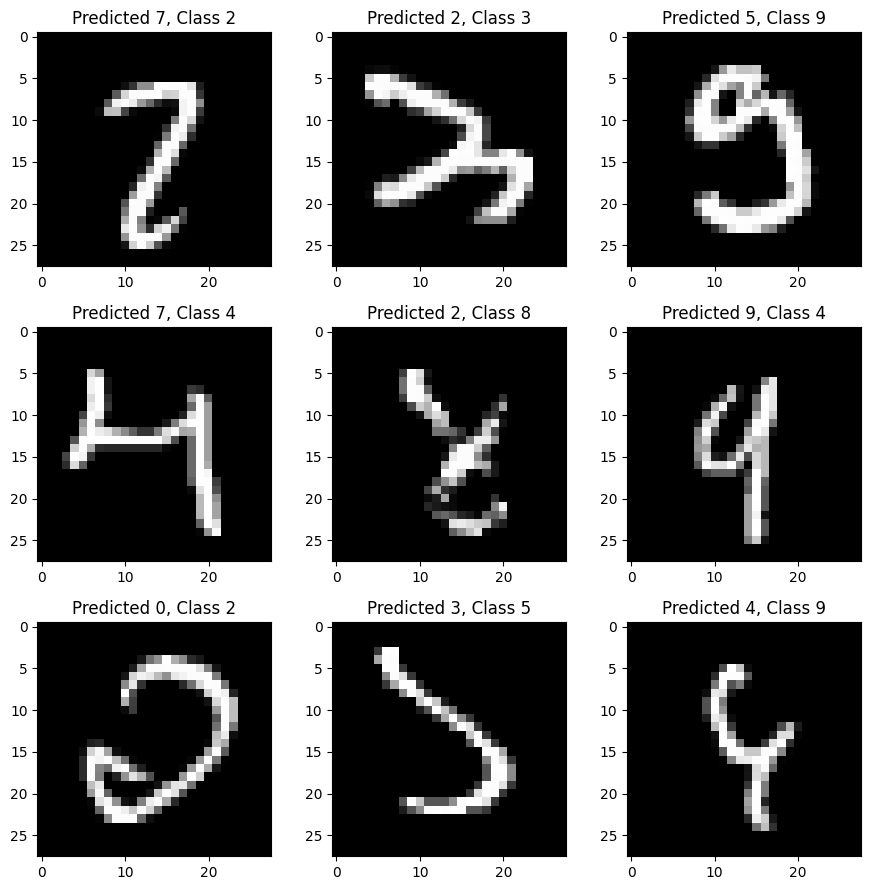

In [35]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()